# Initial Exploratory Data Analysis (EDA)

* We do an initial exploratory data analysis for the 2016 USA Elections tweet dataset
* Highlights:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
df = pd.read_pickle('tweets.pkl')

## Initial Peek at the Dataset

In [3]:
df.head()

,tweet_id,created_at,entities_hashtags,urls,place_bounding_box,country,place_country_code,place_full_name,place_id,place_name,...,user_favourites_count,user_followers_count,user_following,user_friends_count,user_location,user_screen_name,user_statuses_count,user_time_zone,user_url,user_verified
0,764039724818272256,Fri Aug 12 10:04:00 +0000 2016,[],[],"([[[-90.433909, 38.606163], [-90.433909, 38.64...",United States,US,"Frontenac, MO",29a119f18820c3ad,Frontenac,...,1708,186,None,446,Miami,DUPUY77,17620,None,http://ggm-dupuy.com,False
1,764039733076897792,Fri Aug 12 10:04:02 +0000 2016,"[([62, 72], NOJUSTICE), ([93, 104], TrumpPence)]","[(zerohedge.com/news/2016-08-1…, http://www.ze...","([[[-91.218994, 30.354161], [-91.218994, 30.56...",United States,US,"Baton Rouge, LA",c7ef5f3368b68777,Baton Rouge,...,3850,531,None,677,"Ogletown, DE",redoctapus,5046,Eastern Time (US & Canada),None,False
2,764039769244348417,Fri Aug 12 10:04:10 +0000 2016,[],[],"([[[-90.433909, 38.606163], [-90.433909, 38.64...",United States,US,"Frontenac, MO",29a119f18820c3ad,Frontenac,...,1708,186,None,446,Miami,DUPUY77,17621,None,http://ggm-dupuy.com,False
3,764039812479225856,Fri Aug 12 10:04:21 +0000 2016,[],[],"([[[144.593742, -38.433859], [144.593742, -37....",Australia,AU,"Melbourne, Victoria",01864a8a64df9dc4,Melbourne,...,1514,180,None,298,Australia,jjorgi30,2231,Melbourne,None,False
4,764039849850482689,Fri Aug 12 10:04:30 +0000 2016,"[([0, 4], CNN), ([5, 12], newday), ([19, 25], ...",[],"([[[-76.711521, 39.197211], [-76.711521, 39.37...",United States,US,"Baltimore, MD",c0b8e8dc81930292,Baltimore,...,141,2652,None,2976,None,bspence5,92605,None,None,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657307 entries, 0 to 657306
Data columns (total 35 columns):
tweet_id                 657307 non-null int64
created_at               657307 non-null object
entities_hashtags        657307 non-null object
urls                     657307 non-null object
place_bounding_box       657276 non-null object
country                  657276 non-null object
place_country_code       657276 non-null object
place_full_name          657276 non-null object
place_id                 657276 non-null object
place_name               657276 non-null object
place_place_type         657276 non-null object
place_url                657276 non-null object
favorite_count           657307 non-null int64
geo_coordinates          14007 non-null object
geo_type                 14007 non-null object
text                     657307 non-null object
lang                     657307 non-null object
retweet_count            657307 non-null int64
retweeted                65730

### Missing Data

Some of the features have a lot of missing values:

* geo_coordinates
* geo_type
* user_following

Let's remove them.

In [10]:
df = df.drop(['geo_coordinates', 'geo_type', 'user_following'], axis=1)

# Quantitative Analysis

## Candidate Mentions

We'll create four dummy variables informing if each tweet has a mention to one of the candidates Twitter profile:

* Hillary Clinton - @HillaryClinton
* Bernie Sanders - @BernieSanders
* Ted Cruz - @tedcruz
* Donald Trump - @realDonaldTrump

In [23]:
df['mention_hillary'] = df.text.str.contains('@HillaryClinton').astype(int)
df['mention_ted_cruz'] = df.text.str.contains('@tedcruz').astype(int)
df['mention_bernie_sanders'] = df.text.str.contains('@BernieSanders').astype(int)
df['mention_donald_trump'] = df.text.str.contains('@realDonaldTrump').astype(int)

### Follower Count

Let's look at the distribution for **user_followers_count** for users mentioning Hillary Clinton and Donald Trump.

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


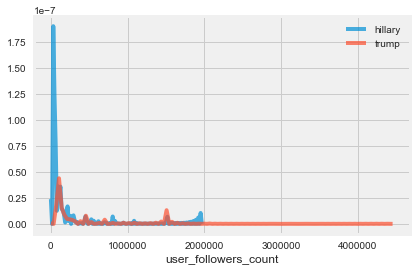

In [21]:
sns.distplot(df[df.hillary == 1].user_followers_count, hist=False, label='hillary', kde_kws={"alpha":0.7})
sns.distplot(df[df.donald_trump == 1].user_followers_count, hist=False, label='trump', kde_kws={"alpha":0.7})

plt.legend()

## Mentions Count

In [26]:
mention_count = df[['mention_hillary', 'mention_ted_cruz', 'mention_bernie_sanders', 'mention_donald_trump']].sum()

([<matplotlib.axis.XTick at 0x1a93789940>,
 <a list of 4 Text xticklabel objects>)

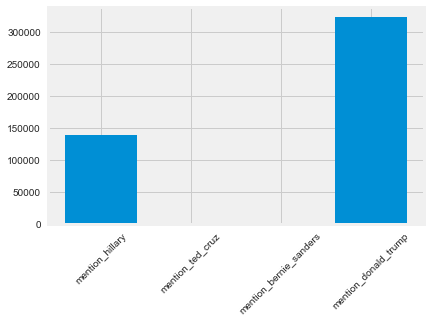

In [35]:
plt.bar(range(0,len(mention_count)), mention_count.values)
        
plt.xticks(range(0,len(mention_count)), mention_count.index, rotation=45)

**Donald Trump** had more than double mentions than **Hillary Clinton**

### Friends Count

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


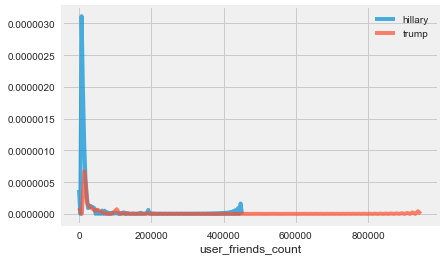

In [38]:
sns.distplot(df[df.mention_hillary == 1].user_friends_count, hist=False, label='hillary', kde_kws={"alpha":0.7})
sns.distplot(df[df.mention_donald_trump == 1].user_friends_count, hist=False, label='trump', kde_kws={"alpha":0.7})

### Top 20 Users Mentioning Hillary

In [45]:
df.groupby('user_screen_name').sum().mention_hillary.sort_values(ascending=False).head(20)

user_screen_name
ofarther           2139.0
chigobiker          910.0
twright55           748.0
misstozak           421.0
terra9441           421.0
lbradley71          417.0
KathyPica1          417.0
buckwinthrop        382.0
casey_holloway      368.0
lindanye6615        364.0
Backhoe44           331.0
conturyboy1905      331.0
harpus88            313.0
Gabsalittle         311.0
8eeccb840d5644a     277.0
zsert7              275.0
GretchenM38         268.0
Trump5254           265.0
DustiHeyZeus        260.0
sandrapatriot       257.0
Name: mention_hillary, dtype: float64

### Top 20 Users Mentioning Trump

In [47]:
df.groupby('user_screen_name').sum().mention_donald_trump.sort_values(ascending=False).head(20)

user_screen_name
pvtbonehead        2693.0
Unclerojelio       2175.0
Non_MSM_News       2017.0
chigobiker         1647.0
djcaldwelldmd      1617.0
ofarther           1411.0
purdycan           1370.0
MeanProgress       1273.0
SharNeal           1076.0
8richard6           969.0
Verran179           961.0
JamesSzczur         935.0
jackbgoode1         909.0
DUPUY77             835.0
kathryncis          817.0
DSF2020             788.0
moekamerow          767.0
my2bits4u           661.0
RandyJo7159         657.0
michaelhallida4     628.0
Name: mention_donald_trump, dtype: float64

## Time Series Analysis: Absolute

In [48]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [49]:
df.to_pickle('tweets_v2.0.pkl')

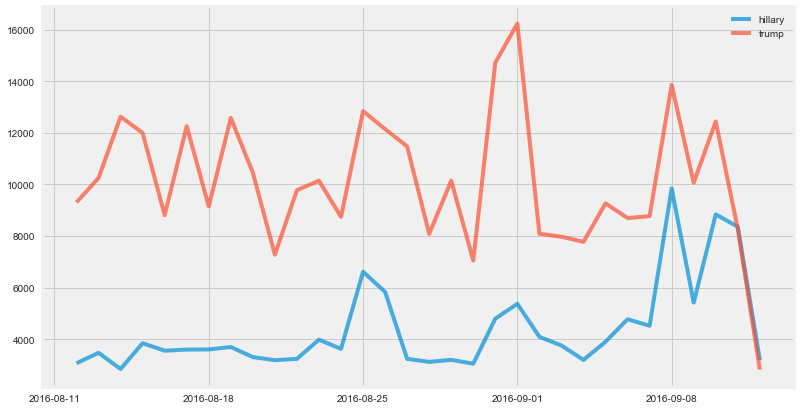

In [55]:
plt.figure(figsize=(12,7))

plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').sum().mention_hillary, label='hillary', alpha=0.7)
plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').sum().mention_donald_trump, label='trump', alpha=0.7)

plt.legend()

## Time Series Analysis: Relative

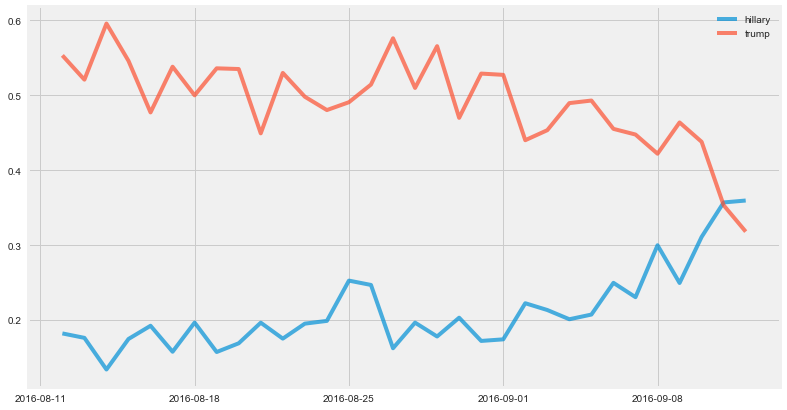

In [56]:
plt.figure(figsize=(12,7))

plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').mean().mention_hillary, label='hillary', alpha=0.7)
plt.plot(df.set_index('created_at').resample('D').count().index, df.set_index('created_at').resample('D').mean().mention_donald_trump, label='trump', alpha=0.7)

plt.legend()

## Separating the Dataset Geographically

Obviously US is the most represented country within the dataset. Let's break the dataset into two datasets and analyze accordingly:

* USA
* World

In [57]:
df_usa = df[df.place_country_code == 'US']
df_world = df[df.place_country_code != 'US']

### Except from USA, which countries have more tweets?

In [62]:
top_20_countries = df_world.groupby('place_country_code').count().tweet_id.sort_values(ascending=False).head(20)

In [65]:
top_20_countries.values

array([17249, 10293,  8637,  2613,  1625,  1448,  1293,  1039,   921,
         904,   902,   849,   804,   767,   732,   633,   534,   507,
         498,   480])

([<matplotlib.axis.XTick at 0x1aa1c90b38>,
 <a list of 20 Text xticklabel objects>)

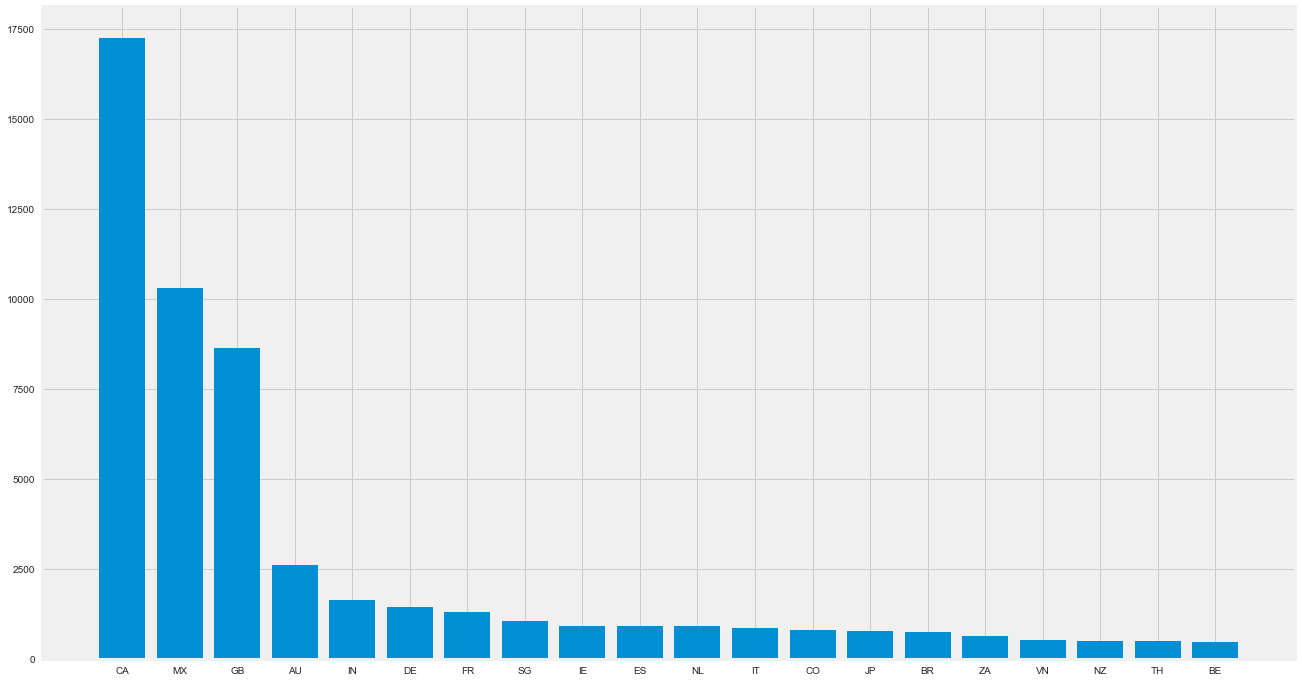

In [73]:
plt.figure(figsize=(20,12))

plt.bar(range(0,len(top_20_countries)), top_20_countries.values)

plt.xticks(range(0,len(top_20_countries)), top_20_countries.index)

## Most Represented Countries

The for most tweeting countries are:

* Canada
* Mexico
* Great Britain
* Australia

In [46]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Qualitative Analysis

### TODO